## HW5

1). $Pr(\mbox{100 packets in a second}) = \frac{\exp(- \lambda t) (\lambda t)^{100}}{100!}$


In [38]:
import math
l=100
t=1
math.exp(-l *t)*math.pow(l*t,100)/math.factorial(100)

0.039860996809147134

2). $Pr(\mbox{Less than 5 packets})=\sum_{n=0}^{4}\frac{\exp(- \lambda t) (\lambda t)^{n}}{n!}$

In [39]:
s=0.
for n in xrange(0,5):
    s=s+math.exp(-l *t)*math.pow(l*t,n)/math.factorial(n)
s

1.6139305336977305e-37

3). $Pr(\mbox{Interarrival time > 20ms}) = \int_{t=20ms}^{\infty} \lambda \exp(-\lambda t) dt = \exp(-\lambda 20ms)$

In [40]:
math.exp(-l * 20/1000)

0.1353352832366127

4). Average wait time = $\frac{\lambda E[X^2]}{2(1-\rho)}$ (P-K Formula)

$E[X^2]=0.005^2 s^2$

$\rho = \frac{\lambda}{\mu} = \lambda \bar{X} = 100 \times 0.005 = 0.5$

In [41]:
wait_time = l*(0.005**2) / (2*(1-0.5))
wait_time

0.0025

5). Average Delay = Average wait time + service time = 0.0025 + 0.005 = 0.0075

6). If half of the packets take 0.01 s to serve, average service time $\bar{X}$= (0.01 + 0.005)/2 = 0.0075

And $E[X^2] = \frac{0.005^2 + 0.01^2}{2}$

$\rho = \frac{\lambda}{\mu} = \lambda \bar{X} = 100 \times 0.0075  = 0.75$

Average wait time = $\frac{\lambda E[X^2]}{2(1-\rho)}$

In [42]:
wait_time=l*(0.005**2+0.01**2)/2/(2*(1-0.75))
wait_time

0.0125

Average Delay = Average wait time + service time = 0.0125 + 0.0075 = 0.02

## HW6

1). 

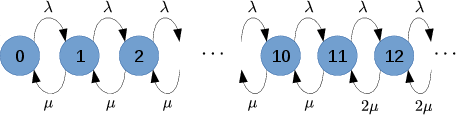

In [43]:
from IPython.display import Image
Image(filename='2016_network_hw.png')

2). $\Pi_n = \rho \Pi_{n-1}$ when $n \le 11$

$\Pi_n = \frac{\rho}{2} \Pi_{n-1}$ otherwise

$1=\sum_{n=0}^{\infty} \Pi_n=\Pi_0 \left[ \sum_{n=0}^{10} \rho^{n} + \sum_{n=0}^{\infty} \rho^{11} \left(\frac{\rho}{2}\right)^n \right]$

$= \Pi_0 \left[ \frac{1- \rho^{11}}{1- \rho} + \frac{\rho^{11}}{1-\rho/2} \right]$

$\Pi_0 = \left[ \frac{1- \rho^{11}}{1- \rho} + \frac{\rho^{11}}{1-\rho/2} \right]^{-1}$

$\Pi_{12} = \frac{\rho^{12}}{2} \Pi_0$

In [44]:
l = 3.
mu = 2.
rho = l/mu
th=11
P0 = 1./((1.-rho**th)/(1-rho) + (rho**th)/(1-rho/2))
P0

0.0019342907820843872

In [45]:
P12= rho**(th+1)/2. * P0
P12

0.1254835726955211

3). Average customer in stores = $\Pi_0 \left[ \sum_{n=0}^{10} n \rho^{n} + \sum_{n=0}^{\infty} (11 + n) \rho^{11} \left(\frac{\rho}{2}\right)^n \right]$

$A\triangleq \sum_{n=0}^{10} n \rho^{n} = \rho \sum_{n=0}^{10} n \rho^{n-1} = \rho \left(\sum_{n=0}^{10} \rho^{n} \right)'= \rho \left(\frac{1-\rho^{11}}{1-\rho}\right)' $

$B \triangleq \sum_{n=0}^{\infty} 11 \rho^{11} \left(\frac{\rho}{2}\right)^n =   \frac{11 \rho^{11} }{1-\rho/2}$

$C \triangleq \sum_{n=0}^{\infty}  n \rho^{11} \left(\frac{\rho}{2}\right)^n = \frac{ \rho^{12}}{2} \sum_{n=0}^{\infty} n \left(\frac{\rho}{2}\right)^{n-1} = \frac{ \rho^{12}}{2 (1-\rho/2)^2} $

In [46]:
import sympy
r=sympy.symbols('r')
f=(1-r**th)/(1-r)
df=sympy.diff(f,r)
A = rho*df.subs(r,rho)
B = th*rho**th/(1-rho/2)
C = rho**(th+1)/(2*(1-rho/2)**2)

In [47]:
Average_num_in_store = P0*(A+B+C)
Average_num_in_store
                        

12.0580287234625

4). Use Little's Theorem, Average time spent (in minutes) = Average_num_in_store / lambda 

In [48]:
Average_time_spent = Average_num_in_store / l 
Average_time_spent

4.01934290782084